---
layout: default
title: "Deep Learning - CNN - Case Studies"
categories: deeplearning
permalink: /ML35/
order: 35
comments: true
---

In [1]:
%pylab --no-import-all inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
from plot_ann import ann
plt.rcParams["mathtext.fontset"] = "cm"
import pandas as pd
import cv2
from scipy.signal import convolve2d, correlate2d
from sklearn.datasets import load_digits

Populating the interactive namespace from numpy and matplotlib


# Case Studies
The past few year of research on convolutional networks applied to computer vision has focused on the design of architectures of convolutional networks. Looking at some examples of CNN designs is useful for two main reasons: first, a number of problems have already been faced by someone else, and looking at how they resolved the problem is sometimes very insightful. Second, to gain intuitions on how to design your own network it is important to look at how others have done it before. Furthermore, a lot of these idea that were specifically designed for computer vision, are cross-contaminating with other fields. We will see:

* Some classic networks, some of these works laid the foundations of modern computer vision ML:
    * LeNet-5
    * AelxNet
    * VGG

* ResNet, or **residual network**, an example of building a very deep (152) layers neural network effectively. 
* A case study of **inception** neural network

## Classic networks
### LeNet-5
The goal of the network was to recognize handwritten digits, its architecture is shown in <a href="#fig:lenet5">the figure below</a>. LeNet-5 architecture starts with a $32 \times 32 \times 1$ grayscale image. In the first step a set of 6 $5 \times 5$ filters with stride $s=1$ and valid padding. This reduce the image to an $28 \times 28 \times 6$ output representation in CONV1 layer. Then the LeNet-5 applies average pooling with a $2 \times 2$ filter with stride $s=2$ that reduces the image to $14 \times 14 \times 6$. Right now a max-pooling is usually used but at the time, average pooling was more popular. The CONV2 layer is obtained by applying 16 $5 \times 5$  filters with stride $s=1$ and valid padding, which result in a $10 \times 10 \times 16$ output representation. When the LeNet-5 network was published padding was not used and in fact it is not applied to the CONV1 and CONV2 layers of this network. A second average pooling layer POOL2 is obtained by a $2 \times 2$ filter with stride $s=2$, which results in a $5\times 5 \times 16$ representation. This 3D matrix is reshaped in a $400 \times 1$ vector in the FC1 layer which is fully connected two FC2 ($120 \times 1$) and FC3 ($84 \times 1$). Finally a $10 \times 1$ output layer allow the multi-class classification. In modern days networks it would be a softmax classifier while in the LeNet-5 a less used classifier was employed.

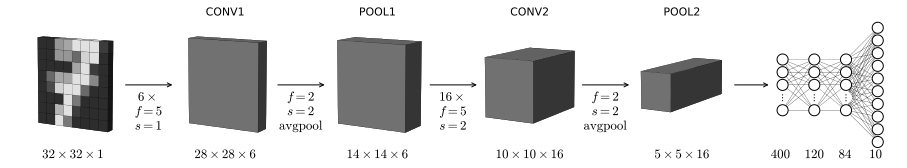

In [2]:
from matplotlib import cm
import matplotlib as mpl
seven = load_digits().images[7]
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(1, 6)
ax1 = fig.add_subplot(gs[0, 0], projection='3d')
ax2 = fig.add_subplot(gs[0, 1], projection='3d')
ax3 = fig.add_subplot(gs[0, 2], projection='3d')
ax4 = fig.add_subplot(gs[0, 3], projection='3d')
ax5 = fig.add_subplot(gs[0, 4], projection='3d')
ax6 = fig.add_subplot(gs[0, 5])


c = cm.get_cmap('gray')(np.rot90(seven, k=3).ravel()/15+.2).reshape(8, 1, 8, 4)

x, y, z = np.indices((8,1,8))
voxels = (x >= 0) & (y >= 0) & (z >= 0)
ax1.voxels(voxels, edgecolor='k', facecolors=c, linewidth=0.1)
ax1.set_box_aspect([8, 1, 8])
ax1.text2D(0.5, 0, '$ 32 \\times 32 \\times 1$', fontsize=13, transform=ax1.transAxes, ha='center', va='top')

x, y, z = np.indices((1,1,1))
voxels = (x >= 0) & (y >= 0) & (z >= 0)
ax2.voxels(voxels, edgecolor='k', facecolors='grey', linewidth=0.1)
ax2.set_box_aspect([28, 6, 28])
ax2.set_title('CONV1', fontsize=11)
ax2.text2D(0.5, 0, '$ 28 \\times 28 \\times 6$', fontsize=13, transform=ax2.transAxes, ha='center', va='top')

ax3.voxels(voxels, edgecolor='k', facecolors='grey', linewidth=0.1)
ax3.set_box_aspect([14, 6, 14])
ax3.set_title('POOL1', fontsize=11)
ax3.text2D(0.5, 0, '$ 14 \\times 14 \\times 6$', fontsize=13, transform=ax3.transAxes, ha='center', va='top')

ax4.voxels(voxels, edgecolor='k', facecolors='grey', linewidth=0.1)
ax4.set_box_aspect([10, 16, 10])
ax4.set_title('CONV2', fontsize=11)
ax4.text2D(0.5, 0, '$ 10 \\times 10 \\times 16$', fontsize=13, transform=ax4.transAxes, ha='center', va='top')

ax5.voxels(voxels, edgecolor='k', facecolors='grey', linewidth=0.1)
ax5.set_box_aspect([5, 16, 5])
ax5.set_title('POOL2', fontsize=11)
ax5.text2D(0.5, 0, '$ 5 \\times 5 \\times 16$', fontsize=13, transform=ax5.transAxes, ha='center', va='top')


ann([5, 5, 5, 10], ax=ax6, radius=2.5, node_labels=[*[*'   ', '$\\vdots$', ' ']*3], node_colors=list('kkkwk')*3, edge_colors=list('kkkwkkkkwkkkkwkwwwwwkkkwk'*3))
ax6.text(0, 0, '$400 \\quad \\; 120 \\quad \\; 84 \\quad \\; \\; 10$', fontsize=13, transform=ax6.transAxes, ha='left', va='top')
ax6.set_aspect('equal')

w1 = plt.annotate('', (.9, 0.5), (.1, 0.5), xycoords=ax1.transAxes, textcoords=ax2.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$6 \\times$\n$f=5$\n$s=1$', xy=(0, 0), xytext=(0.5, -1), xycoords=w1.arrow_patch, ha='center', va='top', fontsize=13)
w2 = plt.annotate('', (.9, 0.5), (.1, 0.5), xycoords=ax2.transAxes, textcoords=ax3.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$f=2$\n$s=2$\n$\\mathrm{avgpool}$', xy=(0, 0), xytext=(0.5, -1), xycoords=w2.arrow_patch, ha='center', va='top', fontsize=13)
w3 = plt.annotate('', (.9, 0.5), (.1, 0.5), xycoords=ax3.transAxes, textcoords=ax4.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$16 \\times$\n$f=5$\n$s=2$', xy=(0, 0), xytext=(0.5, -1), xycoords=w3.arrow_patch, ha='center', va='top', fontsize=13)
w4 = plt.annotate('', (.9, 0.5), (.1, 0.5), xycoords=ax4.transAxes, textcoords=ax5.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$f=2$\n$s=2$\n$\\mathrm{avgpool}$', xy=(0, 0), xytext=(0.5, -1), xycoords=w4.arrow_patch, ha='center', va='top', fontsize=13)
w5 = plt.annotate('', (.9, 0.5), (0, 0.5), xycoords=ax5.transAxes, textcoords=ax6.transAxes, arrowprops=dict(arrowstyle='<-'))

for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.view_init(elev=10, azim=-60)
    ax.set_axis_off()

<i id="fig:lenet5">Architecture of the LeNet-5 classic network</i>

The LeNet-5 network is small by today's standard with approximately 60.000 thousand parameters in total, where nowadays we see networks in the range of 10-100 million parameters. Some other differences in the LeNet-5 architecture from modern standard in CNNs and neural networks in general is the activation function, where the sigmoid and tanh were used back then while we now almost always use ReLU. Furthermore the activation function was applied after pooling, while we now usually apply it before pooling. A couple of things are still designed in the same way in modern networks: as you go deeper in the network, there is a gradual shrink in height and width and the growth in the number of channels; convolutional and pooling layers alternate, even if not always with a 1:1 ratio. 

### AlexNet
The AlexNet has a similar architecture to LeNet-5 (<a href="#fig:alexnet">figure below</a>), in the sense that it alternates pooling layers to convolutional layers with the latest layers being fully connected. It is also similar in the fact that the number of channels grows further down in the network. However it has also many differences. AlexNet uses ReLU activation functions and makes use of *same* padding to prevent excessive shrinking in the width and height dimension. AlexNet has 1000 output classes assigned with a final softmax classifier layer. It has 60 million total parameters and this, together with the possibility of being trained on much more data were the reasons behind its remarkable performance.

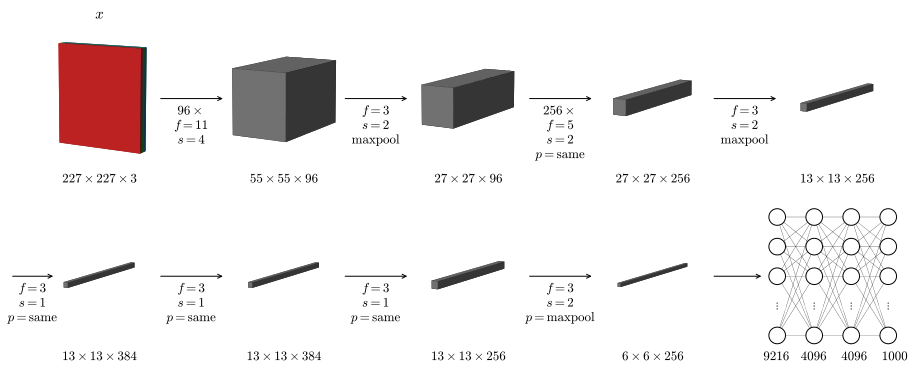

In [3]:
from matplotlib import cm
import matplotlib as mpl
seven = load_digits().images[7]
fig = plt.figure(figsize=(16, 6))
gs = fig.add_gridspec(2, 5)
ax1 = fig.add_subplot(gs[0, 0], projection='3d')
ax2 = fig.add_subplot(gs[0, 1], projection='3d')
ax3 = fig.add_subplot(gs[0, 2], projection='3d')
ax4 = fig.add_subplot(gs[0, 3], projection='3d')
ax5 = fig.add_subplot(gs[0, 4], projection='3d')
ax6 = fig.add_subplot(gs[1, 0], projection='3d')
ax7 = fig.add_subplot(gs[1, 1], projection='3d')
ax8 = fig.add_subplot(gs[1, 2], projection='3d')
ax9 = fig.add_subplot(gs[1, 3], projection='3d')
ax10 = fig.add_subplot(gs[1, 4])


c = cm.get_cmap('gray')(np.rot90(seven, k=3).ravel()/15+.2).reshape(8, 1, 8, 4)

x, y, z = np.indices((1, 3, 1))
r = (x >= 0) & (y == 2) & (z >= 0)
g = (x >= 0) & (y == 1) & (z >= 0)
b = (x >= 0) & (y == 0) & (z >= 0)
voxels = r | g | b 
colors = np.empty(voxels.shape, dtype=object)
colors[r] = 'C0'
colors[g] = 'C2'
colors[b] = 'C3'
ax1.voxels(voxels, edgecolor='none', facecolors=colors, linewidth=0)
ax1.set_title('$x$', fontsize=15)
ax1.set_box_aspect([32, 4, 32])
ax1.text2D(0.5, 0, '$ 227 \\times 227 \\times 3$', fontsize=13, transform=ax1.transAxes, ha='center', va='top')

x, y, z = np.indices((1,1,1))
voxels = (x >= 0) & (y >= 0) & (z >= 0)
ax2.voxels(voxels, edgecolor='k', facecolors='grey', linewidth=0.1)
ax2.set_box_aspect([55, 96, 55])
ax2.text2D(0.5, 0, '$ 55 \\times 55 \\times 96$', fontsize=13, transform=ax2.transAxes, ha='center', va='top')

ax3.voxels(voxels, edgecolor='k', facecolors='grey', linewidth=0.1)
ax3.set_box_aspect([27, 96, 27])
ax3.text2D(0.5, 0, '$ 27 \\times 27 \\times 96$', fontsize=13, transform=ax3.transAxes, ha='center', va='top')

ax4.voxels(voxels, edgecolor='k', facecolors='grey', linewidth=0.1)
ax4.set_box_aspect([27, 256, 27])
ax4.text2D(0.5, 0, '$ 27 \\times 27 \\times 256$', fontsize=13, transform=ax4.transAxes, ha='center', va='top')

ax5.voxels(voxels, edgecolor='k', facecolors='grey', linewidth=0.1)
ax5.set_box_aspect([13, 256, 13])
ax5.text2D(0.5, 0, '$ 13 \\times 13 \\times 256$', fontsize=13, transform=ax5.transAxes, ha='center', va='top')

ax6.voxels(voxels, edgecolor='k', facecolors='grey', linewidth=0.1)
ax6.set_box_aspect([13, 384, 13])
ax6.text2D(0.5, 0, '$13 \\times 13 \\times 384$', fontsize=13, transform=ax6.transAxes, ha='center', va='top')

ax7.voxels(voxels, edgecolor='k', facecolors='grey', linewidth=0.1)
ax7.set_box_aspect([13, 384, 13])
ax7.text2D(0.5, 0, '$13 \\times 13 \\times 384$', fontsize=13, transform=ax7.transAxes, ha='center', va='top')

ax8.voxels(voxels, edgecolor='k', facecolors='grey', linewidth=0.1)
ax8.set_box_aspect([13, 256, 13])
ax8.text2D(0.5, 0, '$13 \\times 13 \\times 256$', fontsize=13, transform=ax8.transAxes, ha='center', va='top')

ax9.voxels(voxels, edgecolor='k', facecolors='grey', linewidth=0.1)
ax9.set_box_aspect([6, 256, 6])
ax9.text2D(0.5, 0, '$6 \\times 6 \\times 256$', fontsize=13, transform=ax9.transAxes, ha='center', va='top')


ann([5, 5, 5, 5], ax=ax10, radius=2.5, node_labels=[*[*'   ', '$\\vdots$', ' ']*4], node_colors=list('kkkwk')*4, edge_colors=list('kkkwkkkkwkkkkwkwwwwwkkkwk'*4))
ax10.text(0, 0, '$9216 \\quad 4096 \\quad \\; 4096 \\quad \\; 1000$', fontsize=13, transform=ax10.transAxes, ha='left', va='top')
ax10.set_aspect('equal')

w1 = plt.annotate('', (.9, 0.5), (.1, 0.5), xycoords=ax1.transAxes, textcoords=ax2.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$96 \\times$\n$f=11$\n$s=4$', xy=(0, 0), xytext=(0.5, -1), xycoords=w1.arrow_patch, ha='center', va='top', fontsize=13)
w2 = plt.annotate('', (.9, 0.5), (.1, 0.5), xycoords=ax2.transAxes, textcoords=ax3.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$f=3$\n$s=2$\n$\\mathrm{maxpool}$', xy=(0, 0), xytext=(0.5, -1), xycoords=w2.arrow_patch, ha='center', va='top', fontsize=13)
w3 = plt.annotate('', (.9, 0.5), (.1, 0.5), xycoords=ax3.transAxes, textcoords=ax4.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$256 \\times$\n$f=5$\n$s=2$\n$p=\\mathrm{same}$', xy=(0, 0), xytext=(0.5, -1), xycoords=w3.arrow_patch, ha='center', va='top', fontsize=13)
w4 = plt.annotate('', (.9, 0.5), (.1, 0.5), xycoords=ax4.transAxes, textcoords=ax5.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$f=3$\n$s=2$\n$\\mathrm{maxpool}$', xy=(0, 0), xytext=(0.5, -1), xycoords=w4.arrow_patch, ha='center', va='top', fontsize=13)
w5 = plt.annotate('', (-.1, 0.5), (.2, 0.5), xycoords=ax6.transAxes, textcoords=ax6.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$f=3$\n$s=1$\n$p=\\mathrm{same}$', xy=(0, 0), xytext=(0.5, -1), xycoords=w5.arrow_patch, ha='center', va='top', fontsize=13)
w6 = plt.annotate('', (.9, 0.5), (.1, 0.5), xycoords=ax6.transAxes, textcoords=ax7.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$f=3$\n$s=1$\n$p=\\mathrm{same}$', xy=(0, 0), xytext=(0.5, -1), xycoords=w6.arrow_patch, ha='center', va='top', fontsize=13)
w7 = plt.annotate('', (.9, 0.5), (.1, 0.5), xycoords=ax7.transAxes, textcoords=ax8.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$f=3$\n$s=1$\n$p=\\mathrm{same}$', xy=(0, 0), xytext=(0.5, -1), xycoords=w7.arrow_patch, ha='center', va='top', fontsize=13)
w8 = plt.annotate('', (.9, 0.5), (.1, 0.5), xycoords=ax8.transAxes, textcoords=ax9.transAxes, arrowprops=dict(arrowstyle='<-'))
plt.annotate('$f=3$\n$s=2$\n$p=\\mathrm{maxpool}$', xy=(0, 0), xytext=(0.5, -1), xycoords=w8.arrow_patch, ha='center', va='top', fontsize=13)
w9 = plt.annotate('', (.9, 0.5), (0, 0.5), xycoords=ax9.transAxes, textcoords=ax10.transAxes, arrowprops=dict(arrowstyle='<-'))


for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]:
    ax.view_init(elev=10, azim=-60)
    ax.set_axis_off()

<i id="fig:alexnet">The AlexNet architecture</i>